# K-Means

## Homework #8 by Glaktionova Natalia

Wholesale customers Data Set

## Знакомство с данными

In [20]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Считываем и просматриваем данные

In [106]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185




Изучаем структуру данных. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


Посмотрим на распределение данных

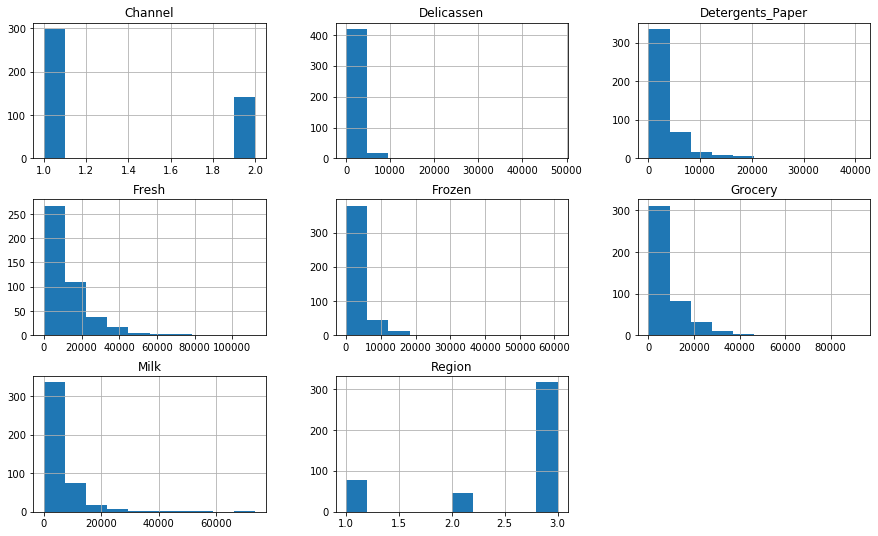

In [39]:
df.hist(figsize=(15, 9));

Преобразуем категориальные переменные

In [107]:
df_channel = pd.get_dummies(df['Channel'], prefix='Channel')
df_dum = pd.concat([df.drop('Channel',axis=1),df_channel], axis=1)

df_region = pd.get_dummies(df['Region'], prefix='Region')
df_dum = pd.concat([df_dum.drop('Region',axis=1),df_region], axis=1)

In [108]:
df_dum.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


Отнормируем данные

In [109]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dum)

**K-means - подбираем k**

In [96]:
from sklearn.metrics import silhouette_score
silhouette = []
inertia = []
k = range(2, 10)

for k_i in k:
    km = KMeans(n_clusters=k_i, random_state=42).fit(df_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(df_scaled, km.labels_))

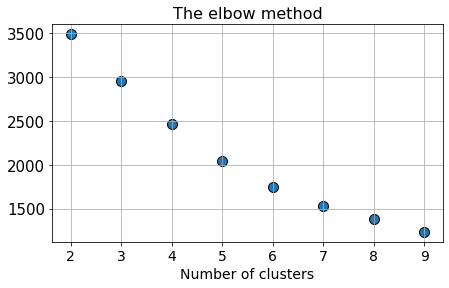

In [125]:
plt.figure(figsize=(7,4))
plt.title("The elbow method",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=inertia,s=100,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Метод локтя не дает четкой картины

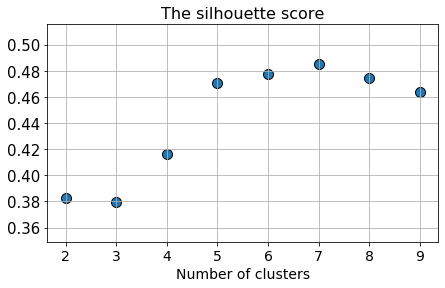

In [127]:
plt.figure(figsize=(7,4))
plt.title("The silhouette score",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=silhouette,s=100,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Наилучшее значение у **k = 7**